In [15]:
from get_data import Data
from plots_data import Plot_Data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils.cchc_preprocess import download_excel_to_df,preprocess_iCE


In [16]:
import seaborn as sns


<Axes: xlabel='Date'>

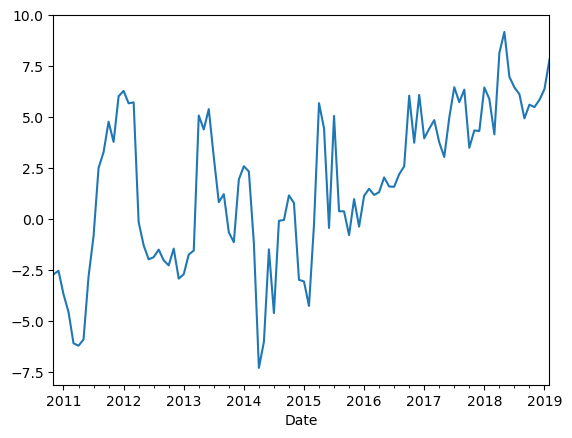

In [102]:
df_new=df["Materiales"]
df_new.index.name="Date"
var=(df_new.shift(-12)-df_new)/df_new*100
data=var#*df["Materiales peso"].shift(-12)
data.iloc[250:350].plot()

In [8]:
df.columns.values

array(['Materiales', 'Sueldos y Salarios', 'Misceláneos',
       'Índice general', 'Obra Gruesa', 'Terminaciones', 'Instalaciones',
       'Costos Indirectos', 'Variación 12 meses', 'Materiales peso',
       'Sueldos y Salarios peso', 'Misceláneos peso', 'Obra Gruesa peso',
       'Terminaciones peso', 'Instalaciones peso',
       'Costos Indirectos peso'], dtype=object)

<Axes: xlabel='Date'>

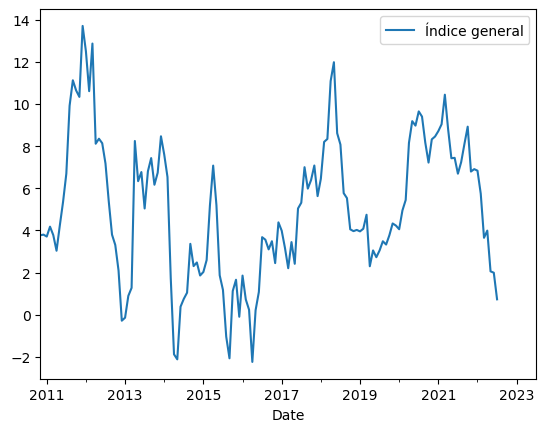

In [10]:
df_new=df.loc[:,["Índice general"]]
df_new.index.name="Date"
var=(df_new.shift(-12)-df_new)/df_new*100
#var.plot()
data=var#*df.loc[:,["Materiales peso","Sueldos y Salarios peso","Instalaciones peso","Misceláneos peso"]].shift(-12)
var.iloc[250:,:].plot()

In [21]:
import matplotlib.pyplot as plt

In [40]:
import pandas as pd

In [50]:
from plots_data import Plot_Data

In [67]:
args=        { # "F034.VVNS.FLU.CCHC.Z.0.T" trimestral ventas vivienda
        "series":["F034.CVV.FLU.BCCH.Z.DEPN.T"],  #casas nuevas
        "nombres" : ["Número de Propiedades: General y Zonas Casas"],
        "desde":"2008-01-01"}

plot_args={"kind":"line",
    "title":"Número de Propiedades Casas"   # ajustar
    }

plot=Plot_Data()
plot.get_data_plots(args)   # estandarizar este plot
plot.plot_serie(plot_args=plot_args)
plt.show()

c:\Users\augus\anaconda3\envs\Tareas\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\augus\anaconda3\envs\Tareas\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date'>

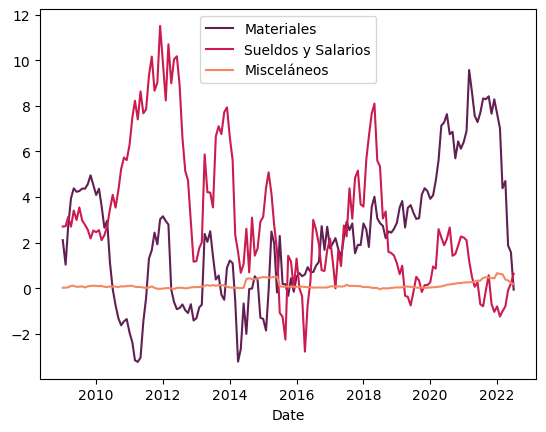

In [49]:
mat=var["Materiales"]*df["Materiales peso"].shift(-12)
sysal=var["Sueldos y Salarios"]*df["Sueldos y Salarios peso"].shift(-12)
misc=var["Misceláneos"]*df["Misceláneos peso"].shift(-12)

df_combined = pd.concat([mat, sysal, misc], axis=1)
column_names={0:"Materiales",1:"Sueldos y Salarios",2:"Misceláneos"}
df_combined.rename(columns=column_names,inplace=True)
sns.lineplot(data=df_combined,palette="rocket",dashes=False)

#plt.show()

c:\Users\augus\anaconda3\envs\Tareas\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\augus\anaconda3\envs\Tareas\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


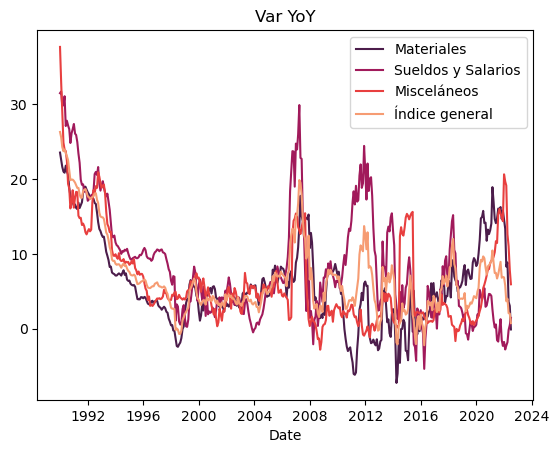

In [31]:
df_new=df.loc[:,["Materiales","Sueldos y Salarios","Misceláneos","Índice general"]]
df_new.index.name="Date"
var=(df_new.shift(-12)-df_new)/df_new*100
sns.color_palette("flare")

sns.lineplot(data=var,dashes=False,palette="rocket").set_title("Var YoY")
plt.show()

In [40]:
a=(df["Materiales"].shift(-12)- df['Materiales'])/df['Materiales']*(df["Materiales peso"].shift(-12))*100

In [6]:
diferencia_desfase = df['Materiales'].shift(12) - df['Materiales']

# Dividir la diferencia por la columna 'x'
resultado = diferencia_desfase / df['Materiales']
resultado

2010-01-01         NaN
2011-01-01         NaN
2012-01-01         NaN
2013-01-01         NaN
2014-01-01         NaN
2015-01-01         NaN
2016-01-01         NaN
2017-01-01         NaN
2018-01-01         NaN
2019-01-01         NaN
2020-01-01         NaN
2021-01-01         NaN
2022-01-01   -0.355069
2023-01-01   -0.397053
Name: Materiales, dtype: object

In [26]:
df_new=df.drop(['Índice general', 'Variación 12 meses'], axis=1)

In [13]:
pd.DataFrame(df.iloc[12:,:3].values*df.iloc[12:,8].values, columns=df.columns, index=df.index)

ValueError: operands could not be broadcast together with shapes (391,3) (391,) 

In [28]:
import numpy as np

In [125]:
import math
df=preprocess(dfs)

In [126]:
df

,Materiales,Sueldos y Salarios,Misceláneos,Índice general,Obra Gruesa,Terminaciones,Instalaciones,Costos Indirectos,Variación 12 meses
1990-01-01,1000.98,581.71,413.21,795.36,950.970593,839.165878,584.976989,630.385579,NaN
1990-02-01,1019.18,590.67,426.21,809.56,972.422242,850.294647,594.149224,645.025587,NaN
1990-03-01,1038.89,609.95,440.29,828.71,995.060926,869.733996,606.049981,663.925761,NaN
1990-04-01,1060.89,622.93,459.15,846.93,1024.612341,881.78042,620.737515,682.899173,NaN
1990-05-01,1071.36,633.89,477.53,858.13,1036.598865,892.021892,632.765746,694.559892,NaN
...,...,...,...,...,...,...,...,...,...
2023-03-01,7473.463923,8434.430749,3586.326354,7592.907342,8669.525249,6639.350115,7409.032795,8391.001208,0.036509
2023-04-01,7546.017574,8418.422426,3426.104542,7614.72783,8759.669526,6689.661969,7341.074372,8317.463115,0.039925
2023-05-01,7368.191996,8504.049367,3409.355043,7552.105132,8649.722228,6569.663353,7371.556008,8384.162979,0.020578
2023-06-01,7316.340352,8509.704757,3371.657098,7523.988281,8536.020386,6625.714488,7218.41179,8374.260741,0.019929


In [59]:
import requests
import pandas as pd
from io import BytesIO

# URL of the Excel file
url = "https://cchc.cl/uploads/indicador/archivos/ICEWeb.xls"

# Send a GET request to download the file
response = requests.get(url)


# Raise an exception if the request was unsuccessful
response.raise_for_status()

content_type = response.headers.get('Content-Type')
print(f"Content-Type: {content_type}")

with open('downloaded_file.xlsx', 'wb') as f:
    f.write(response.content)

# Read the Excel file into a DataFrame


Content-Type: application/vnd.ms-excel


<Axes: >

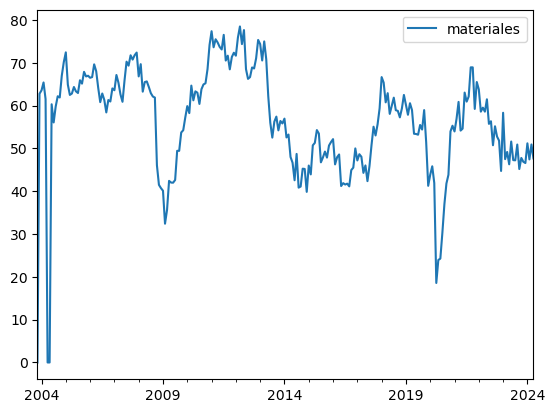

In [54]:
args=        {
        "series":["G089.IME.IND.A36.M"],
        "nombres" : ["materiales"]  
    }
data=Data()
df=data.get_data_from_args(args)
df.plot()

In [48]:
pd.set_option('display.max_rows', 1000)
data=Data()
data.search_data("préstamo")

,seriesId,frequencyCode,spanishTitle,englishTitle,firstObservation,lastObservation,updatedAt,createdAt
0,F061.2B412.FLU.S.USD.Z.M,MONTHLY,"Préstamos, 1996-2011 (activos, BP)","Loans, 1996-2011 (assets, BP)",1996-03-01,2012-01-01,2015-01-09,2015-01-09
1,F061.2B422.FLU.S.USD.Z.M,MONTHLY,"Préstamos, 1996-2011 (pasivos, BP)","Loans, 1996-2011 (liabilities, BP)",1996-03-01,2012-01-01,2015-01-09,2015-01-09
2,F065.DEB.PP.40.STO.CP.30.USD.M,MONTHLY,Deuda externa bruta: Bancos préstamos c/p,External debt - Banks - Long-term - Loans,1995-12-01,2015-01-01,2015-05-07,2015-03-09
3,F065.DEB.PP.40.STO.LP.30.USD.M,MONTHLY,Deuda externa bruta: Bancos préstamos l/p,External debt - Banks - Long-term - Loans,1995-12-01,2015-01-01,2015-05-07,2015-03-09
4,F065.DEB.PP.50.STO.CP.30.USD.M,MONTHLY,Deuda externa bruta: Otros sectores préstamos c/p,External debt - Other sectors - Long-term - Loans,1995-12-01,2015-01-01,2015-05-07,2015-03-09
5,F065.DEB.PP.50.STO.LP.30.USD.M,MONTHLY,Deuda externa bruta: Otros sectores préstamos l/p,External debt - Other sectors - Long-term - Loans,1995-12-01,2015-01-01,2015-05-07,2015-03-09
6,F065.DEB.PP.51.STO.LP.30.USD.M,MONTHLY,Deuda externa bruta sociedades financieras no ...,External debt - Nonbank financial corporations...,1995-12-01,2015-01-01,2015-05-07,2015-03-09
7,F065.DEB.PP.52.STO.CP.30.USD.M,MONTHLY,Deuda externa bruta sociedades no financieras ...,External debt - Nonfinancial corporations - Sh...,1995-12-01,2015-01-01,2015-05-07,2015-03-09
8,F065.DEB.PP.52.STO.LP.30.USD.M,MONTHLY,Deuda externa bruta sociedades no financieras ...,External debt - Nonfinancial corporations - Lo...,1995-12-01,2015-01-01,2015-05-07,2015-03-09
9,F065.DEB.PR.50.STO.CP.10.USD.M,MONTHLY,Deuda externa bruta: Inversión Directa: Présta...,External debt - Direct investment: intercompan...,1995-12-01,2015-01-01,2015-05-07,2015-03-09


In [37]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import time

In [38]:
Empresa = ['https://www.cmfchile.cl/portal/principal/613/w3-search.php?keywords=falabella#fiscalizados',"//td[text()='90749000']","./following-sibling::td/a"]
keys = ["Url", "selector1", "Selector2"]

In [39]:
año = ["Año" ,2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 20211, 2010, 2009, 2008, 2007, 2006, 2005]
quarter = ["Q4", "Q3", "Q2", "Q1"]
Tipo_Norma = ["Seleccione", "Estandar IFRS", "Norma Chilena"]


#----------Reemplazar valores en la siguiente lista ----------------------------
configurador = [3,1,1]

In [40]:
import os

In [41]:
class Cmf_scrapper: # dos datos balance y estado resultados
    def __init__(self,browser="edge",driver_path=None):
        self.browser = browser
        self.driver_path = driver_path or self.get_default_driver_path()

    def get_default_driver_path(self):
        drivers = {
            'edge': 'msedgedriver.exe'
        }
        return drivers.get(self.browser, drivers['edge'])
    
    def _init_driver(self):
        if self.browser == "edge":
            absolute_path = os.path.abspath("drivers")
            full_driver_path=os.path.join(absolute_path, self.driver_path)
            self.driver = webdriver.Edge(executable_path=full_driver_path)
        else:
            raise ValueError("Browser not supported")
        return(self.driver)

In [42]:
scrappy=Cmf_scrapper()
driver=scrappy._init_driver()

In [43]:
# Inicializar el navegador web

# Cargar la página de inicio de la empresa en este ejemplo, 
driver.get(Empresa[0])
#time.sleep(2)
td_element = driver.find_element(By.XPATH,Empresa[1])
a_element = td_element.find_element(By.XPATH,Empresa[2])
a_element.click()
#time.sleep(2)


estados_financieros = driver.find_element(By.XPATH, "//*[@id='listado_reportes']/li[3]/a")
estados_financieros.click()
#time.sleep(2)

from selenium.webdriver.support.ui import Select

periodo = driver.find_element(By.ID,'mm')
# Crear un objeto Select a partir del elemento <select>
select_periodo = Select(periodo)
# Obtener todas las opciones del <select> en una lista
base_periodo = select_periodo.options
#-----------------------------------------
año = driver.find_element(By.ID,'aa')
# Crear un objeto Select a partir del elemento <select>
select_año = Select(año)
# Obtener todas las opciones del <select> en una lista
base_año = select_año.options
#--------------------------------------------------------
tipo_norma = driver.find_element(By.NAME,'tipo_norma')
# Crear un objeto Select a partir del elemento <select>
select_tipo_norma = Select(tipo_norma)
# Obtener todas las opciones del <select> en una lista
base_tipo_norma = select_tipo_norma.options

base_año[configurador[0]].click()
base_periodo[configurador[1]].click()
base_tipo_norma[configurador[2]].click()

#time.sleep(2)
consulta = driver.find_element(By.XPATH, '//input[@alt="Consultar"]')
consulta.click()

In [27]:
tabla_eerr = driver.find_element(By.XPATH,"//*[@id='ERF']/table")
filas_eerr =driver.find_elements(By.TAG_NAME, "tr")

encabezados = []
for encabezado in tabla_eerr.find_elements(By.TAG_NAME,'th'):
    encabezados.append(encabezado.text)
datos_eerr = []
for fila in tabla_eerr.find_elements(By.TAG_NAME,'tr'):
    fila_datos_eerr = []
    for celda in fila.find_elements(By.TAG_NAME,'td'):
        fila_datos_eerr.append(celda.text)
    if fila_datos_eerr:
        datos_eerr.append(fila_datos_eerr)
df_eerr = pd.DataFrame(datos_eerr, columns=encabezados)

#Con esto cerramos el dataframe
#driver.close()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id='ERF']/table"}
  (Session info: MicrosoftEdge=125.0.2535.51)


In [12]:
#Ruta donde guardaremos nuestros Excel
ruta = "P:/Control de gestión/Reportes/2022/Flash 2.0/CMF"

In [14]:
tabla_html = """
#<table>
#    ...
#</table>
"""

soup = BeautifulSoup(tabla_html, 'html.parser')
tabla = soup.find('table')
filas = tabla.find_all('tr')
        
tabla = driver.find_element(By.TAG_NAME,'table')

encabezados = []
for encabezado in tabla.find_elements(By.TAG_NAME,'th'):
    encabezados.append(encabezado.text)
datos = []
for fila in tabla.find_elements(By.TAG_NAME,'tr'):
    fila_datos = []
    for celda in fila.find_elements(By.TAG_NAME,'td'):
        fila_datos.append(celda.text)
    if fila_datos:
        datos.append(fila_datos)
df = pd.DataFrame(datos)#, columns=encabezados)

In [15]:
df

,0
0,Fecha de consulta: 22/05/2024 11:51


In [1]:
import os

In [4]:
file="hola"
os.path.join("data", f"{file}.csv")

'data\\hola.csv'

In [5]:
import os
for file in os.listdir("data"):
            if file.endswith(".csv"):
                    print(file)

plot.csv


In [3]:
data=Data()
#data.get_data()
#data.download_data()

,seriesId,frequencyCode,spanishTitle,englishTitle,firstObservation,lastObservation,updatedAt,createdAt
0,F034.BESAN.IND.BCCH.2020.0.D,DAILY,Región de Antofagasta; Boletas electrónicas em...,Región de Antofagasta; Electronic bills issued...,2020-01-07,2024-04-15,2024-05-06,2024-05-06
1,F034.BESOAN.IND.BCCH.2020.0.D,DAILY,Región de Antofagasta; Boletas electrónicas em...,Región de Antofagasta; Electronic bills issued...,2020-01-01,2024-04-15,2024-05-06,2024-05-06
2,F022.CCPEAN.STO.Z.Z.Z.M,MONTHLY,Número de cuentas corrientes de personas natur...,Number of checking accounts in foreign currenc...,2009-01-01,2024-02-01,2024-05-08,2024-05-08
3,F022.CCPNAN.STO.Z.Z.Z.M,MONTHLY,Número de cuentas corrientes de personas natur...,Number of checking accounts in national curren...,2009-01-01,2024-02-01,2024-05-08,2024-05-08
4,F022.DCM90AN.TAS.Z.Z.Z.M,MONTHLY,Deuda comercial con mora de 90 días o más; Reg...,Commercial debt 90 or more days past due; Regi...,2008-01-01,2024-02-01,2024-05-08,2024-05-08
...,...,...,...,...,...,...,...,...
167,F035.PIB.V12.R.CLP.2018.12.Z.Z.02.0.A,ANNUAL,"PIB Administración pública, Región de Antofaga...","Public administration GDP, Region of Antofagas...",2014-01-01,2023-01-01,2024-04-23,2024-04-23
168,F035.PIB.V12.R.CLP.2018.COM.Z.Z.02.0.A,ANNUAL,"PIB Comercio, Región de Antofagasta, contribuc...","Wholesale and retail trade GDP, Region of Anto...",2014-01-01,2023-01-01,2024-04-23,2024-04-23
169,F035.PIB.V12.R.CLP.2018.RH.Z.Z.02.0.A,ANNUAL,"PIB Restaurantes y hoteles, Región de Antofaga...","Hotels and restaurants GDP, Region of Antofaga...",2014-01-01,2023-01-01,2024-04-23,2024-04-23
170,F035.PIB.V12.R.CLP.2018.Z.Z.Z.02.0.A,ANNUAL,"PIB Región de Antofagasta, contribución porcen...","GDP, Region of Antofagasta, contribution comp...",2014-01-01,2023-01-01,2024-04-23,2024-04-23
